# Notebook Parameters

In [1]:
main_dir = '/Users/davide/Developer/tropical_cyclone_tracking'
# path to dataset directory (if CMIP6 data must be in the proper grid format)
# dataset_dir = f'{main_dir}/data/projections/nicam16-9s/'
dataset_dir = f'{main_dir}/data/datasets/north_pacific/'
# path to model that we want to use in inference
model_dir = f'{main_dir}/backup/02_vgg_v3_relu/'
# path to IBTrACS file to match ML model detections
ibtracs_src = f'{main_dir}/data/ibtracs/full/ibtracs_ALL.1980-2020_main_tracks_only_6_hourly.csv'
# scalers directory
scaler_dir = f'{main_dir}/data/scaler'
# define lat and lon ranges
lat_range = (0,70)
lon_range = (100,320)
# determine if the dataset is projection or not
is_cmip6 = False
year = 1993

## Inference Workflow

In [6]:
import torch
import sys

import warnings
warnings.filterwarnings('ignore')

sys.path.append('../resources/library')
from tropical_cyclone.inference import SingleModelInference, get_observations, get_detected_tracks, get_observed_tracks
from tropical_cyclone.visualize import plot_detections, plot_tracks
from tropical_cyclone.models import *

In [7]:
inference = SingleModelInference(model_dir=model_dir, device='mps')
drivers = inference.drivers
ds, dates = inference.load_dataset(dataset_dir=dataset_dir, drivers=drivers, year=year, is_cmip6=is_cmip6)
detections = inference.predict(ds, patch_size=40)

100%|██████████| 9/9 [00:07<00:00,  1.14it/s]


In [8]:
observations = get_observations(ibtracs_src=ibtracs_src, dates=dates, lat_range=lat_range, lon_range=lon_range)

# Apply Tracking Algorithm

In [ ]:
det_tracks = inference.tracking(detections, max_distance=400.0, min_track_count=12)
obs_tracks = get_observed_tracks(observations)

## Detections

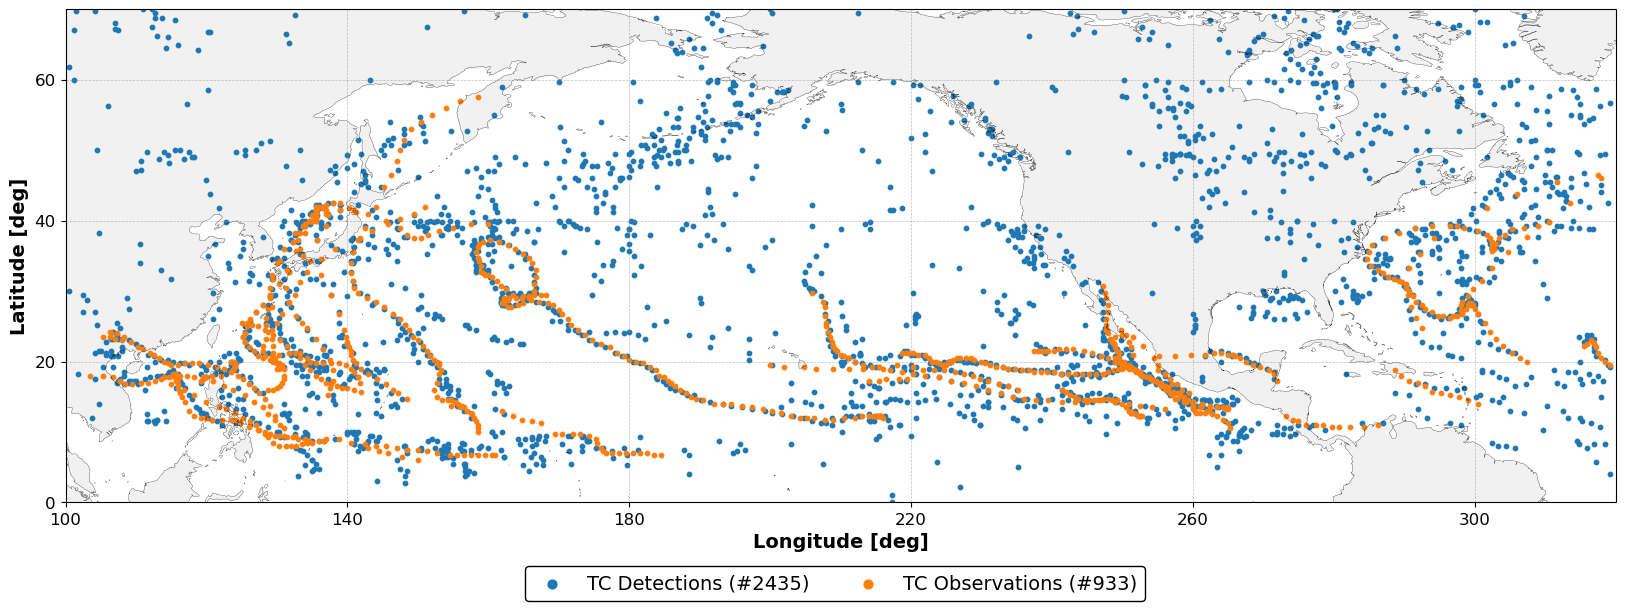

In [10]:
plot_detections(detections, observations, lat_range, lon_range)

## Tracks

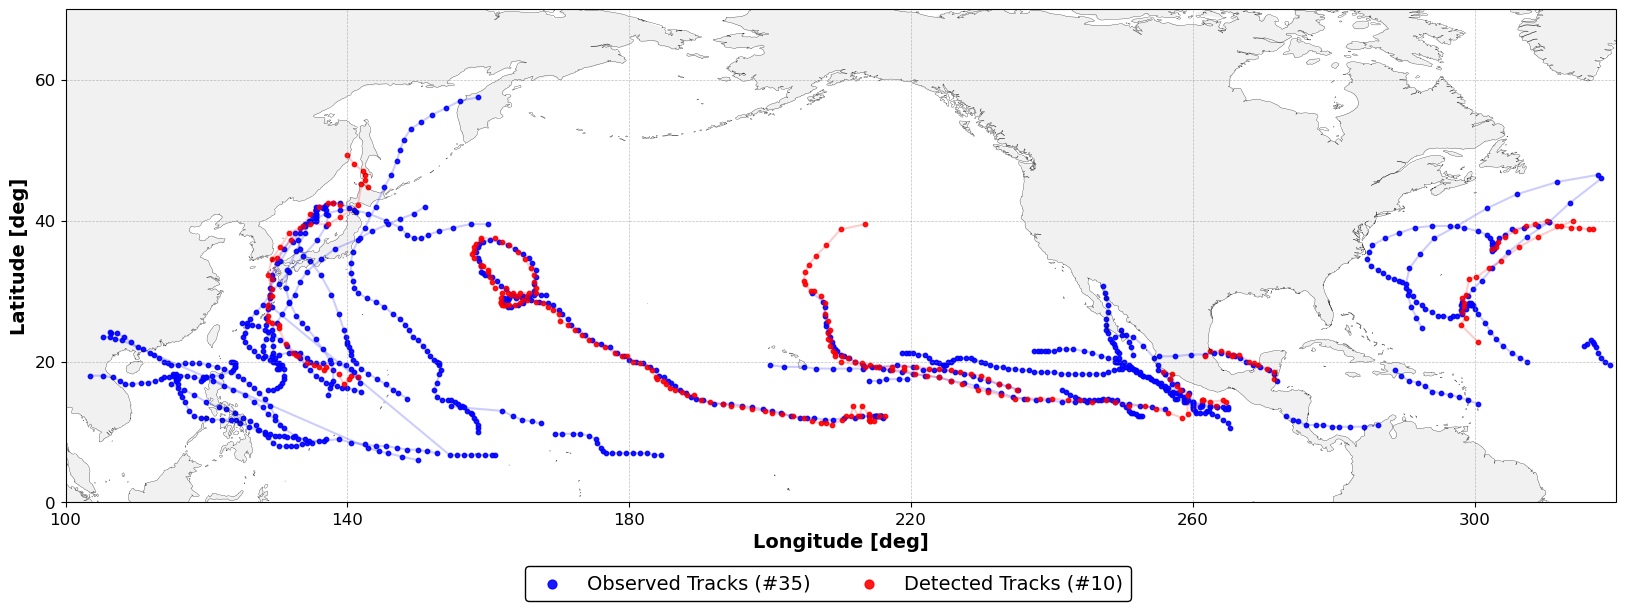

In [11]:
plot_tracks(det_tracks, obs_tracks, lat_range, lon_range)